## The file is executing the slideshow at the following command:


- jupyter nbconvert Slide_Deck_Presentation.ipynb --to slides --post serve --template output-toggle.tpl


#  Communicating the Findings - Indian Premier League (IPL) Dataset
## by (Meghashyamnaidu Bone)

## Investigation Overview

> The goal of this exploration of Indian Premier League (IPL) Dataset is to understand  

> (1) How the teams are performing (winning percentage) ?

> (2) What is the average number of runs/wickets with which teams are winning ?

> (3) To find the most valuable players ?

> (4) How the location and the toss decision affect the team winning percentage ?

## Dataset Overview

> The dataset consists of the Indian Premier League is a professional Twenty20 cricket league matches information happened in India from the years between 2008 to 2017

> The dataset can be download at the URL https://www.kaggle.com/manasgarg/ipl#matches.csv


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('matches.csv')

In [3]:
#creating a function for barplot as I have used bar plot a lot in this analysis

def bar_plot(variable, xlabel, ylabel, title):
    plt.figure(figsize = (9,6))
    variable.value_counts().plot(kind = 'bar')
    plt.xlabel(xlabel, fontsize = 10)
    plt.ylabel(ylabel, fontsize = 10)
    plt.title(title, fontsize = 15)

### Relation between Year and Number of Total Number of Matches Played


- The highest t-20 IPL matches happened in the year of 2013 and least are in the year of 2014.

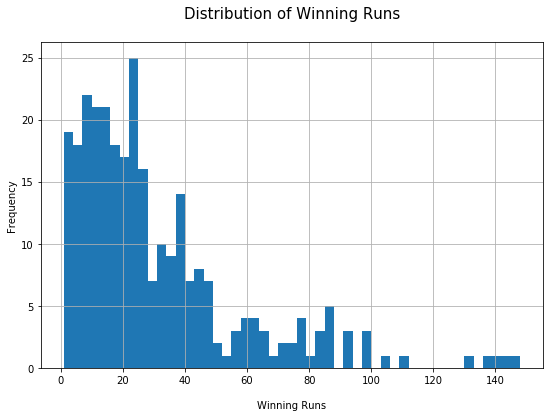

In [4]:
#creating bins with equal portions using min an dmax values of the feature

plt.figure(figsize = (9,6))
bin_edges = np.arange(df[df.win_by_runs != 0].win_by_runs.min(), df[df.win_by_runs != 0].win_by_runs.max()+3, 3);
df[df.win_by_runs != 0].win_by_runs.hist(bins = bin_edges);
plt.title('Distribution of Winning Runs\n', fontsize = 15);
plt.xlabel('\nWinning Runs', fontsize = 10);
plt.ylabel('Frequency', fontsize = 10);

## How many wickets left when a team chased the total to win and their occurances?


- Most of the times, the teams chased the scored with **7** wickets in hand wheras **1** wicket is the least.

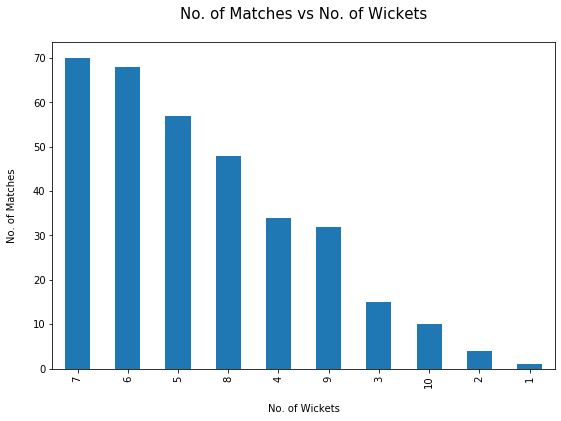

In [5]:
bar_plot(df[df.win_by_wickets!=0].win_by_wickets, '\nNo. of Wickets', 'No. of Matches\n', 'No. of Matches vs No. of Wickets\n')


## Average winning Runs for the teams

- Of the all winning matches of the teams, **Royal Challengers Bangalore** has the controlled the opponent team well to secune a win with more runs and where as **Gujarat Lions** with the least.

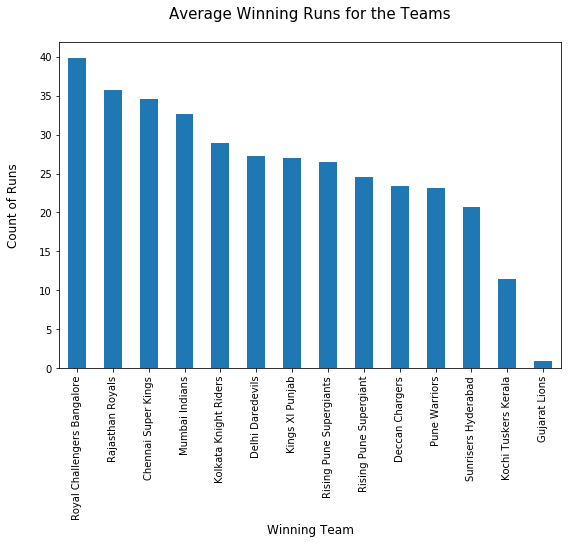

In [8]:
plt.figure(figsize = (9,6))
df[df.win_by_runs != 0].groupby('winner')['win_by_runs'].mean().sort_values(ascending = False).plot(kind = 'bar');
plt.ylabel('Count of Runs\n', fontsize = 12);
plt.xlabel('Winning Team', fontsize = 12);
plt.title('Average Winning Runs for the Teams\n', fontsize = 15);

## Average winning Wickets for the teams

-Of the all winning matches of the teams, **Kochi Tuskers Kerala** won with highest wickets left whereas **Gujarat Lions** has the least wickets left.

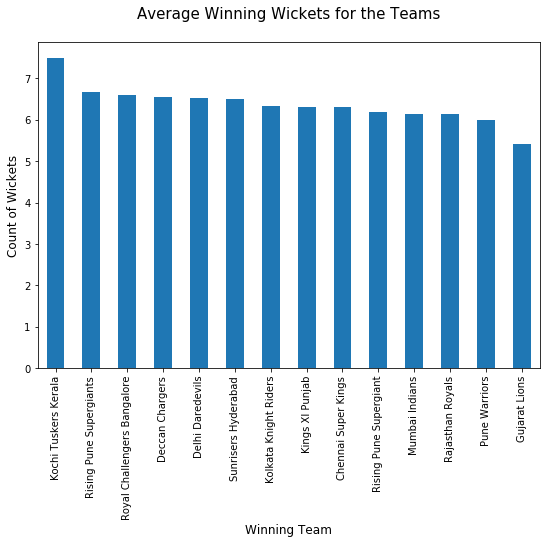

In [9]:
#finding the average winning wickets for teams using groupby function

plt.figure(figsize = (9,6))
df[df.win_by_wickets != 0].groupby('winner')['win_by_wickets'].mean().sort_values(ascending = False).plot(kind = 'bar');
plt.ylabel('Count of Wickets', fontsize = 12);
plt.xlabel('Winning Team', fontsize = 12);
plt.title('Average Winning Wickets for the Teams\n', fontsize = 15);

## Most Valuable Players

- **CH Gayle, YK Pathan, DA Warner, AB de Villiers and RG Sharma** are the most top 5 most valueble player and I have made this decision on the basis of number of the player_of_the_match

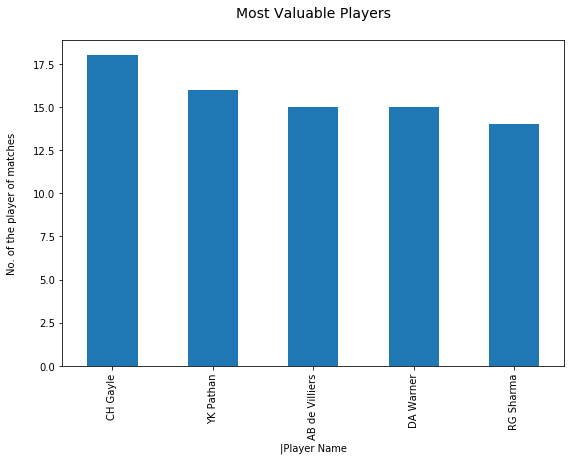

In [12]:
#creating bar plot using value_counts() function

plt.figure(figsize = (9,6))
df.player_of_match.value_counts().sort_values(ascending = False).head(5).plot(kind = 'bar');
plt.xlabel('|Player Name', fontsize = 10);
plt.ylabel('No. of the player of matches\n',  fontsize = 10);
plt.title('Most Valuable Players\n', fontsize = 14);

## What is the toss decision ratio for the teams ?

- There is huge difference betweeen no. of times times **Royal Challengers Bangalore** opted to bat and chose to field after winning the toss.

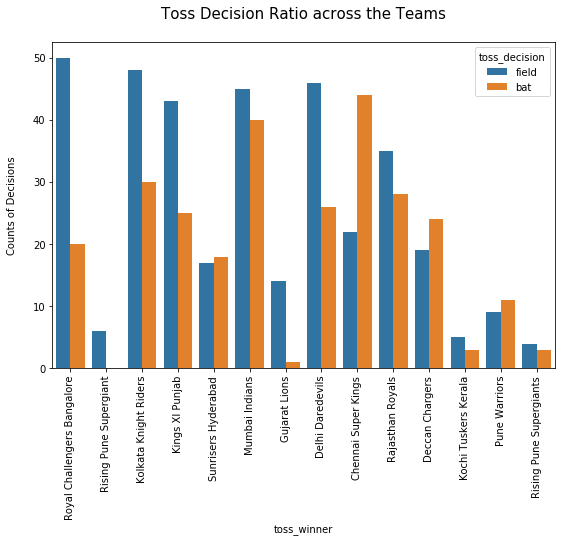

In [13]:
plt.figure(figsize = (9,6))
sns.countplot(data = df, x = 'toss_winner',  hue = 'toss_decision');
plt.xticks(rotation = 90);
plt.ylabel('Counts of Decisions\n', fontsize = 10);
plt.title('Toss Decision Ratio across the Teams\n', fontsize = 15);